In [1]:
import sys
import json
import pandas as pd
import csv

In [2]:
pairs = pd.read_csv("/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv")

pairs.drop(columns=["Unnamed: 0"],inplace=True)

pairs['pFile']=pairs.pFile.str.replace('bmp','json')

jsonit = []
path = '/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Peel/'
for file in pairs['pFile']:
    with open(path+file,'r') as f:
        jsonit.append(json.load(f))

viat = []
arkit = []
for j in range(len(jsonit)):
    for i in range(len(jsonit[j]['Defects'])):
        viat.append(jsonit[j]['Defects'][i]['m_ObjDefectName'])

pd.DataFrame(viat).value_counts()

DEFECT_DARK_KNOT       6197
DEFECT_DECAY           1622
DEFECT_SOUND_KNOT       565
DEFECT_HEART            278
DEFECT_HOLE             266
DEFECT_OPEN_SPLIT        39
DEFECT_FISHTAIL_END      18
DEFECT_INNER_SPLIT       17
DEFECT_WANE               3
dtype: int64

In [3]:
jsonit[0]

{'FileName': '20210505123334_85.datx',
 'Defects': [{'name': 'MObjDefect',
   'm_iDefectType': 1,
   'm_dFeatures': [10.467360000000001,
    8.78925,
    10.762883186340332,
    9.268350601196289,
    69.170553732,
    -6.308431784715494,
    69.170553732,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1],
   'm_dOriginalFeatures': [10.467360000000001,
    8.78925,
    10.762883186340332,
    9.268350601196289,
    69.170553732,
    -6.308431784715494,
    69.170553732,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1],
   'm_pPresentation': {'m_ePresentation': 0,
    'm_iReportingFrontEdge': 972630,
    'm_iPoints': 36,
    'm_pntPoint': [{'x': 2569, 'y': 64},
     {'x': 2570, 'y': 63},
     {'x': 2571, 'y': 62},
     {'x': 2572, 'y': 61},
     {'x': 2573, 'y': 61},
     {'x': 2574, 'y': 60},
     {'x': 2575, 'y': 60},
     {'x': 2576, 'y': 60},
     {'x': 2577, 'y': 60},
     {'x': 2578, 'y': 60},
     {'x': 2579, 'y': 60},
     {'x': 2580,

orient = 'columns'
orient = 'records'
orient = 'index'
orient = 'split'
orient = 'table'

In [4]:
dataframe = pd.DataFrame.from_dict(jsonit[0], orient="index")
dataframe.head(5)

,0
FileName,20210505123334_85.datx
Defects,"[{'name': 'MObjDefect', 'm_iDefectType': 1, 'm..."
ObjectData,"[{'name': 'MObjInfo', 'm_uIndexInMainObjectLis..."
MoistureBlocks,[{'m_dCalculatedFeatures': [120.07941484451294...
DensityBlocks,"[{'Density': 967.5130147157184, 'm_pntTL': {'x..."


In [5]:
df_nested_list = pd.json_normalize(jsonit[0])

In [6]:
df_nested_list

,FileName,Defects,ObjectData,MoistureBlocks,DensityBlocks,Helpers
0,20210505123334_85.datx,"[{'name': 'MObjDefect', 'm_iDefectType': 1, 'm...","[{'name': 'MObjInfo', 'm_uIndexInMainObjectLis...",[{'m_dCalculatedFeatures': [120.07941484451294...,"[{'Density': 967.5130147157184, 'm_pntTL': {'x...","[{'0': {'typeName': 'e_Sheet', 'ids': [100, 10..."


In [7]:
df_nested_list2 = pd.json_normalize(jsonit[0], record_path =['Defects'])

In [8]:
df_nested_list2

,name,m_iDefectType,m_dFeatures,m_dOriginalFeatures,m_ObjDefectName,m_pPresentation.m_ePresentation,m_pPresentation.m_iReportingFrontEdge,m_pPresentation.m_iPoints,m_pPresentation.m_pntPoint,m_mmpntGravity.x,m_mmpntGravity.y,m_mmpntRectangle.x,m_mmpntRectangle.y
0,MObjDefect,1,"[10.467360000000001, 8.78925, 10.7628831863403...","[10.467360000000001, 8.78925, 10.7628831863403...",DEFECT_HOLE,0,972630,36,"[{'x': 2569, 'y': 64}, {'x': 2570, 'y': 63}, {...",1497,37,1498,39
1,MObjDefect,7,"[34.891200000000005, 9.96115, 33.0971260070800...","[34.891200000000005, 9.96115, 33.0971260070800...",DEFECT_SOUND_KNOT,0,972630,36,"[{'x': 562, 'y': 24}, {'x': 568, 'y': 23}, {'x...",343,15,343,16
2,MObjDefect,12,"[25.005360000000003, 13.476849999999999, 23.49...","[25.005360000000003, 13.476849999999999, 23.49...",DEFECT_DARK_KNOT,0,972630,36,"[{'x': 2556, 'y': 64}, {'x': 2560, 'y': 63}, {...",1497,37,1498,39
3,MObjDefect,12,"[5.815200000000001, 5.27355, 6.84009313583374,...","[5.815200000000001, 5.27355, 6.84009313583374,...",DEFECT_DARK_KNOT,0,972630,20,"[{'x': 1209, 'y': 91}, {'x': 1210, 'y': 90}, {...",704,52,705,54
4,MObjDefect,12,"[21.51624, 12.890899999999998, 21.049861907958...","[21.51624, 12.890899999999998, 21.049861907958...",DEFECT_DARK_KNOT,0,972630,36,"[{'x': 1220, 'y': 83}, {'x': 1224, 'y': 82}, {...",719,51,719,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,MObjDefect,12,"[26.749920000000003, 12.30495, 24.319965362548...","[26.749920000000003, 12.30495, 24.319965362548...",DEFECT_DARK_KNOT,0,972630,36,"[{'x': 686, 'y': 2797}, {'x': 691, 'y': 2796},...",408,1637,412,1638
117,MObjDefect,12,"[16.28256, 9.96115, 16.153966903686523, 10.458...","[16.28256, 9.96115, 16.153966903686523, 10.458...",DEFECT_DARK_KNOT,0,972630,36,"[{'x': 3073, 'y': 2760}, {'x': 3076, 'y': 2759...",1793,1617,1794,1618
118,MObjDefect,12,"[13.374960000000002, 7.61735, 13.9196786880493...","[13.374960000000002, 7.61735, 13.9196786880493...",DEFECT_DARK_KNOT,0,972630,36,"[{'x': 2648, 'y': 2829}, {'x': 2650, 'y': 2829...",1545,1656,1546,1658
119,MObjDefect,12,"[3.48912, 2.92975, 4.191540718078613, 3.310214...","[3.48912, 2.92975, 4.191540718078613, 3.310214...",DEFECT_DARK_KNOT,0,972630,12,"[{'x': 2906, 'y': 2772}, {'x': 2907, 'y': 2771...",1690,1623,1691,1624


In [17]:
FIELDS = ["m_uWidth", "m_uLength","m_dThickness","ObjectResX", "ObjectResY"]

df_ObjectData = pd.json_normalize(jsonit[0]["ObjectData"][0])
df_ObjectData[FIELDS]

,m_uWidth,m_uLength,m_dThickness,ObjectResX,ObjectResY
0,1750.23265,1599.76152,1.56,0.58152,0.58595


In [54]:
# FIELDS = ["m_dCalculatedFeatures", "m_pntTL","m_pntTR","m_pntBL", "m_pntBR"]

df_MoistureBlocks = pd.json_normalize(jsonit[0]["MoistureBlocks"])
# df_MoistureBlocks
df_coordinates = df_MoistureBlocks.drop(columns=["m_dCalculatedFeatures","FeaturesExplained"])
df_coordinates

,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y
0,1134,34,1272,34,1134,98,1272,98
1,1306,34,1444,34,1306,98,1444,98
2,1822,34,1960,34,1822,98,1960,98
3,1994,34,2132,34,1994,98,2132,98
4,2510,34,2648,34,2510,98,2648,98
...,...,...,...,...,...,...,...,...
271,1306,2914,1444,2914,1306,2978,1444,2978
272,1822,2914,1960,2914,1822,2978,1960,2978
273,1994,2914,2132,2914,1994,2978,2132,2978
274,2510,2914,2648,2914,2510,2978,2648,2978


In [55]:
df_calculatedFeatures = pd.DataFrame(df_MoistureBlocks["m_dCalculatedFeatures"].to_list(), columns=['Moisture', 'Temperature'])
df_calculatedFeatures

,Moisture,Temperature
0,120.079415,32.715626
1,111.417279,32.715626
2,126.424345,34.779999
3,125.890390,34.779999
4,123.073276,33.336249
...,...,...
271,116.982223,34.230936
272,116.430233,36.615781
273,125.136675,36.615781
274,119.140910,34.099375


In [56]:
df_MoistureBlocks = df_calculatedFeatures.join(df_coordinates)
df_MoistureBlocks

,Moisture,Temperature,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y
0,120.079415,32.715626,1134,34,1272,34,1134,98,1272,98
1,111.417279,32.715626,1306,34,1444,34,1306,98,1444,98
2,126.424345,34.779999,1822,34,1960,34,1822,98,1960,98
3,125.890390,34.779999,1994,34,2132,34,1994,98,2132,98
4,123.073276,33.336249,2510,34,2648,34,2510,98,2648,98
...,...,...,...,...,...,...,...,...,...,...
271,116.982223,34.230936,1306,2914,1444,2914,1306,2978,1444,2978
272,116.430233,36.615781,1822,2914,1960,2914,1822,2978,1960,2978
273,125.136675,36.615781,1994,2914,2132,2914,1994,2978,2132,2978
274,119.140910,34.099375,2510,2914,2648,2914,2510,2978,2648,2978


In [58]:
df_DensityBlocks = pd.json_normalize(jsonit[0]["DensityBlocks"])
df_DensityBlocks

,Density,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y
0,967.513015,765,34,1039,34,765,98,1039,98
1,1011.198652,765,98,1039,98,765,162,1039,162
2,976.182619,2966,34,3240,34,2966,98,3240,98
3,1035.248569,2966,98,3240,98,2966,162,3240,162
4,1016.816563,765,162,1039,162,765,226,1039,226
...,...,...,...,...,...,...,...,...,...
87,1039.556130,765,2914,1039,2914,765,2978,1039,2978
88,1028.912957,2966,2722,3240,2722,2966,2786,3240,2786
89,1054.534560,2966,2786,3240,2786,2966,2850,3240,2850
90,1045.062843,2966,2850,3240,2850,2966,2914,3240,2914


In [84]:
df_Defects = pd.json_normalize(jsonit[0]["Defects"])
# df_MoistureBlocks

# m_ObjDefectName      m_dOriginalFeatures          m_mmpntGravity.x        m_mmpntGravity.y

df_Defects = df_Defects.drop(columns=["m_dFeatures","m_pPresentation.m_ePresentation","m_pPresentation.m_iReportingFrontEdge",
                                     "m_pPresentation.m_iPoints", "m_pPresentation.m_pntPoint", "m_mmpntRectangle.x", "m_mmpntRectangle.y"])
# df_coordinates
df_Defects

,name,m_iDefectType,m_dOriginalFeatures,m_ObjDefectName,m_mmpntGravity.x,m_mmpntGravity.y
0,MObjDefect,1,"[10.467360000000001, 8.78925, 10.7628831863403...",DEFECT_HOLE,1497,37
1,MObjDefect,7,"[34.891200000000005, 9.96115, 33.0971260070800...",DEFECT_SOUND_KNOT,343,15
2,MObjDefect,12,"[25.005360000000003, 13.476849999999999, 23.49...",DEFECT_DARK_KNOT,1497,37
3,MObjDefect,12,"[5.815200000000001, 5.27355, 6.84009313583374,...",DEFECT_DARK_KNOT,704,52
4,MObjDefect,12,"[21.51624, 12.890899999999998, 21.049861907958...",DEFECT_DARK_KNOT,719,51
...,...,...,...,...,...,...
116,MObjDefect,12,"[26.749920000000003, 12.30495, 24.319965362548...",DEFECT_DARK_KNOT,408,1637
117,MObjDefect,12,"[16.28256, 9.96115, 16.153966903686523, 10.458...",DEFECT_DARK_KNOT,1793,1617
118,MObjDefect,12,"[13.374960000000002, 7.61735, 13.9196786880493...",DEFECT_DARK_KNOT,1545,1656
119,MObjDefect,12,"[3.48912, 2.92975, 4.191540718078613, 3.310214...",DEFECT_DARK_KNOT,1690,1623


In [85]:
df_OriginalFeatures = pd.DataFrame(df_Defects["m_dOriginalFeatures"].to_list())

df_OriginalFeatures.drop(columns=df_OriginalFeatures.columns.difference([0,1]),inplace=True)
df_OriginalFeatures.rename(columns={0: "DEFECT_FEATURE_BOX_LENGTH",
                                    1: "DEFECT_FEATURE_BOX_WIDTH"}, inplace=True, errors='raise')
df_OriginalFeatures

,DEFECT_FEATURE_BOX_LENGTH,DEFECT_FEATURE_BOX_WIDTH
0,10.46736,8.78925
1,34.89120,9.96115
2,25.00536,13.47685
3,5.81520,5.27355
4,21.51624,12.89090
...,...,...
116,26.74992,12.30495
117,16.28256,9.96115
118,13.37496,7.61735
119,3.48912,2.92975


In [86]:
df_Defects = df_Defects.drop(columns=["m_dOriginalFeatures","name","m_iDefectType"])
df_Defects                            

,m_ObjDefectName,m_mmpntGravity.x,m_mmpntGravity.y
0,DEFECT_HOLE,1497,37
1,DEFECT_SOUND_KNOT,343,15
2,DEFECT_DARK_KNOT,1497,37
3,DEFECT_DARK_KNOT,704,52
4,DEFECT_DARK_KNOT,719,51
...,...,...,...
116,DEFECT_DARK_KNOT,408,1637
117,DEFECT_DARK_KNOT,1793,1617
118,DEFECT_DARK_KNOT,1545,1656
119,DEFECT_DARK_KNOT,1690,1623


In [87]:
df_Defects = df_OriginalFeatures.join(df_Defects)
df_Defects

,DEFECT_FEATURE_BOX_LENGTH,DEFECT_FEATURE_BOX_WIDTH,m_ObjDefectName,m_mmpntGravity.x,m_mmpntGravity.y
0,10.46736,8.78925,DEFECT_HOLE,1497,37
1,34.89120,9.96115,DEFECT_SOUND_KNOT,343,15
2,25.00536,13.47685,DEFECT_DARK_KNOT,1497,37
3,5.81520,5.27355,DEFECT_DARK_KNOT,704,52
4,21.51624,12.89090,DEFECT_DARK_KNOT,719,51
...,...,...,...,...,...
116,26.74992,12.30495,DEFECT_DARK_KNOT,408,1637
117,16.28256,9.96115,DEFECT_DARK_KNOT,1793,1617
118,13.37496,7.61735,DEFECT_DARK_KNOT,1545,1656
119,3.48912,2.92975,DEFECT_DARK_KNOT,1690,1623


# -----------------------------------------------------

In [92]:
df_Defects

,DEFECT_FEATURE_BOX_LENGTH,DEFECT_FEATURE_BOX_WIDTH,m_ObjDefectName,m_mmpntGravity.x,m_mmpntGravity.y
0,10.46736,8.78925,DEFECT_HOLE,1497,37
1,34.89120,9.96115,DEFECT_SOUND_KNOT,343,15
2,25.00536,13.47685,DEFECT_DARK_KNOT,1497,37
3,5.81520,5.27355,DEFECT_DARK_KNOT,704,52
4,21.51624,12.89090,DEFECT_DARK_KNOT,719,51
...,...,...,...,...,...
116,26.74992,12.30495,DEFECT_DARK_KNOT,408,1637
117,16.28256,9.96115,DEFECT_DARK_KNOT,1793,1617
118,13.37496,7.61735,DEFECT_DARK_KNOT,1545,1656
119,3.48912,2.92975,DEFECT_DARK_KNOT,1690,1623


In [91]:
FIELDS = ["m_uWidth", "m_uLength","m_dThickness","ObjectResX", "ObjectResY"]
df_ObjectData[FIELDS]

,m_uWidth,m_uLength,m_dThickness,ObjectResX,ObjectResY
0,1750.23265,1599.76152,1.56,0.58152,0.58595


In [93]:
df_MoistureBlocks

,Moisture,Temperature,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y
0,120.079415,32.715626,1134,34,1272,34,1134,98,1272,98
1,111.417279,32.715626,1306,34,1444,34,1306,98,1444,98
2,126.424345,34.779999,1822,34,1960,34,1822,98,1960,98
3,125.890390,34.779999,1994,34,2132,34,1994,98,2132,98
4,123.073276,33.336249,2510,34,2648,34,2510,98,2648,98
...,...,...,...,...,...,...,...,...,...,...
271,116.982223,34.230936,1306,2914,1444,2914,1306,2978,1444,2978
272,116.430233,36.615781,1822,2914,1960,2914,1822,2978,1960,2978
273,125.136675,36.615781,1994,2914,2132,2914,1994,2978,2132,2978
274,119.140910,34.099375,2510,2914,2648,2914,2510,2978,2648,2978


In [94]:
df_DensityBlocks

,Density,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y
0,967.513015,765,34,1039,34,765,98,1039,98
1,1011.198652,765,98,1039,98,765,162,1039,162
2,976.182619,2966,34,3240,34,2966,98,3240,98
3,1035.248569,2966,98,3240,98,2966,162,3240,162
4,1016.816563,765,162,1039,162,765,226,1039,226
...,...,...,...,...,...,...,...,...,...
87,1039.556130,765,2914,1039,2914,765,2978,1039,2978
88,1028.912957,2966,2722,3240,2722,2966,2786,3240,2786
89,1054.534560,2966,2786,3240,2786,2966,2850,3240,2850
90,1045.062843,2966,2850,3240,2850,2966,2914,3240,2914


In [98]:
df_Defects['m_mmpntGravity.x'] / df_ObjectData['ObjectResX'][0]

0      2574.288073
1       589.833540
2      2574.288073
3      1210.620443
4      1236.414913
          ...     
116     701.609575
117    3083.298941
118    2656.830376
119    2906.176916
120    2911.335810
Name: m_mmpntGravity.x, Length: 121, dtype: float64

In [100]:
df_Defects['GravityX'] = df_Defects['m_mmpntGravity.x'] / df_ObjectData['ObjectResX'][0]
df_Defects['GravityY'] = df_Defects['m_mmpntGravity.y'] / df_ObjectData['ObjectResY'][0]

In [102]:
df_Defects = df_Defects.drop(columns=["m_mmpntGravity.x","m_mmpntGravity.y"])

In [103]:
df_Defects

,DEFECT_FEATURE_BOX_LENGTH,DEFECT_FEATURE_BOX_WIDTH,m_ObjDefectName,GravityX,GravityY
0,10.46736,8.78925,DEFECT_HOLE,2574.288073,63.145320
1,34.89120,9.96115,DEFECT_SOUND_KNOT,589.833540,25.599454
2,25.00536,13.47685,DEFECT_DARK_KNOT,2574.288073,63.145320
3,5.81520,5.27355,DEFECT_DARK_KNOT,1210.620443,88.744773
4,21.51624,12.89090,DEFECT_DARK_KNOT,1236.414913,87.038143
...,...,...,...,...,...
116,26.74992,12.30495,DEFECT_DARK_KNOT,701.609575,2793.753733
117,16.28256,9.96115,DEFECT_DARK_KNOT,3083.298941,2759.621128
118,13.37496,7.61735,DEFECT_DARK_KNOT,2656.830376,2826.179708
119,3.48912,2.92975,DEFECT_DARK_KNOT,2906.176916,2769.860910


In [135]:
LENGTH = df_Defects['DEFECT_FEATURE_BOX_LENGTH'][16] / 2
WIDTH = df_Defects['DEFECT_FEATURE_BOX_WIDTH'][16] / 2

x = [df_Defects['GravityX'][16]+LENGTH, df_Defects['GravityX'][16]-LENGTH]
y = [df_Defects['GravityY'][16]+WIDTH, df_Defects['GravityY'][16]-WIDTH]

y2 =[df_Defects['GravityY'][16],df_Defects['GravityY'][16]]
x2 =[df_Defects['GravityX'][16],df_Defects['GravityX'][16]]

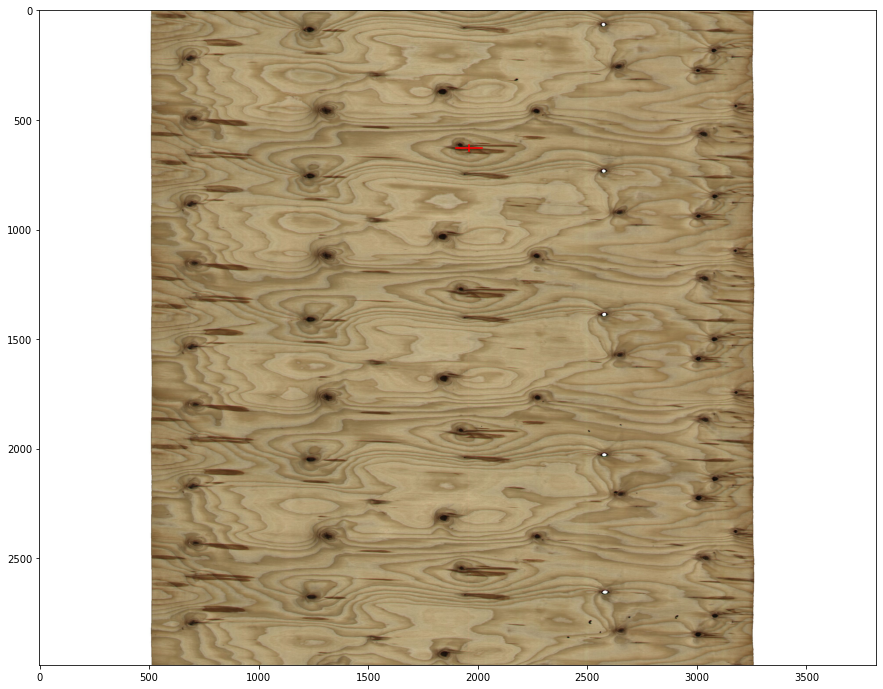

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
img = plt.imread("ColorImage.jpeg")
imgplot = plt.imshow(img)


# plt.scatter(df_Defects['GravityX'][0], df_Defects['GravityY'][0]) 

plt.plot(x,y2, color='red') # Vaakasuunta

plt.plot(x2,y,color='red') # Pystysuunta

In [132]:
df_Defects['DEFECT_FEATURE_BOX_WIDTH'].max()

29.2975

In [134]:
df_Defects.loc[df_Defects['DEFECT_FEATURE_BOX_WIDTH'] == 29.2975]

,DEFECT_FEATURE_BOX_LENGTH,DEFECT_FEATURE_BOX_WIDTH,m_ObjDefectName,GravityX,GravityY
16,119.79312,29.2975,DEFECT_DECAY,1958.660063,628.039935
